In [24]:
import matplotlib.pylab as plt
from termcolor import colored

In [13]:
## Initial Population 
N = 1000000
N_ITER = 1000
## Number of Susceptible people
S = N - 1
## Number of Infected people 
I = 1

## Parameters 

## Transmission rate prior to change
BETA = 0.3

## Recovery rate
GAMMA = 0.1



In [55]:

def sis_infection(susceptible_people:int, ## Susceptible (S)
                  infected_people:int,    ## Infected    (I)
                  population:int,         ## Population  (N)
                  beta:float,             ## Transmission Rate prior to change (beta)
                  gamma:float,            ## Recovery Rate (gamma)
                  n_iterations:int,       ## Number of iterations
                  verbosity:bool=True,     ## Whether to show every 50th iteration the results 
                  _plot:bool=False) -> list:    ## Whether to plot the final results 
    """
    
    Calculates the SIS model by the following equation: 
    
    INITIAL CONFIGURATION: 
    
    Population  (N) = 100
    Susceptible (S) = N - 1  (100 - 1 = 99)
    Infected    (I) = 1
    
    MODEL: 
    
    For every timeperiod t_{i}, the susceptible and infected populations
    will be recalculated using a set recovery rate ($\gamma$) and a 
    transmission rate prior to change. 
    
    gamma = 0.2 ## recovery rate 
    beta = 0.3  ## transmission rate 
    
    S = (S - beta * S * I/N) + gamma * I
    S = (I - beta * S * I/N) + gamma * I
    
    """
    ## holders 
    sholder = [None] * population
    iholder = [None] * population
    ## text 
    for idx,t in enumerate(range (0, n_iterations)):
        ## update the susceptible population 
        susceptible_people = susceptible_people - (beta * susceptible_people * infected_people / population) + gamma * infected_people
        ## update the infected population 
        infected_people = infected_people + (beta * susceptible_people * infected_people / population) - gamma * infected_people
        ## update the holders 
        sholder[idx] = susceptible_people
        iholder[idx] = infected_people
        ## some feedback
        if verbosity: 
            if t%50 == 0:
                it_txt = f"| Iteration = {t} | "
                s_txt = f"Susceptible = {round(susceptible_people,0)} ({susceptible_people/population*100:.2f}%) | "
                i_txt = f"Infected = {round(infected_people,0)} ({infected_people/population*100:.2f}%)|"
                print(it_txt, colored(s_txt, 'green'), colored(i_txt,'red'))
                
    if _plot:
        ## show the plots 
        figure = plt.figure()  ## creating the figure 
        figure.canvas.manager.set_window_title ('SIS model') ## set a title 
        plt.plot(iholder, label='Infected - I(t)') ## plot the I 
        plt.plot(sholder, label='Susceptible - S(t)') ## plot the S 
        plt.legend() ## add legend 
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) ## scientificnotation 
        plt.xlabel('Timepoint (T)') ## labels 
        plt.ylabel('Percentage of Individuals (N in %)') ## labels 
        plt.show()
    ## return the variables 
    return sholder, iholder

In [56]:
## Initial Population 
N = 1000000
N_ITER = 1000
## Number of Susceptible people
S = N - 1
## Number of Infected people 
I = 1
## Parameters 
## Transmission rate prior to change
BETA = 0.5
## Recovery rate
GAMMA = 0.2
## Verbosity 
VERBOSITY = True 
## plotting 
PLOTTING = True
## kwargs
config = {
        "susceptible_people" : S,
        "infected_people"    : I,
        "population"         : N,
        "beta"               : BETA, 
        "gamma"              : GAMMA, 
        "n_iterations"       : N_ITER,
        "verbosity"          : VERBOSITY,
        "_plot"              : PLOTTING
        }

| Iteration = 0 |  Susceptible = 999999.0 (100.00%) |  Infected = 1.0 (0.00%)|
| Iteration = 50 |  Susceptible = 673217.0 (67.32%) |  Infected = 303485.0 (30.35%)|
| Iteration = 100 |  Susceptible = 400000.0 (40.00%) |  Infected = 521515.0 (52.15%)|
| Iteration = 150 |  Susceptible = 400000.0 (40.00%) |  Infected = 521515.0 (52.15%)|
| Iteration = 200 |  Susceptible = 400000.0 (40.00%) |  Infected = 521515.0 (52.15%)|
| Iteration = 250 |  Susceptible = 400000.0 (40.00%) |  Infected = 521515.0 (52.15%)|
| Iteration = 300 |  Susceptible = 400000.0 (40.00%) |  Infected = 521515.0 (52.15%)|
| Iteration = 350 |  Susceptible = 400000.0 (40.00%) |  Infected = 521515.0 (52.15%)|
| Iteration = 400 |  Susceptible = 400000.0 (40.00%) |  Infected = 521515.0 (52.15%)|
| Iteration = 450 |  Susceptible = 400000.0 (40.00%) |  Infected = 521515.0 (52.15%)|
| Iteration = 500 |  Susceptible = 400000.0 (40.00%) |  Infected = 521515.0 (52.15%)|
| Iteration = 550 |  Susceptible = 400000.0 (40.00%) |  Infect

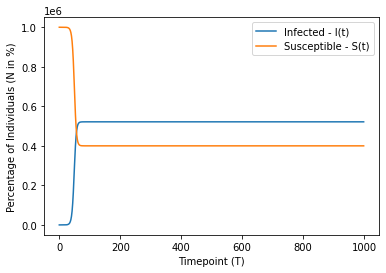

In [57]:
sus, inf = sis_infection(**config)

In [ ]:
S, I = sis_infection(susceptible_people:int,
                  infected_people:int,
                  population:int,
                  beta:float,
                  gamma:float,
                  n_iterations:int,
                  verbosity:bool=True,
                  _plot:bool=False)